In [1]:
import openseespy.opensees as ops
import opsvis as opsv
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
# import ASRE models
cur_dir = os.getcwd()
ASREpy_dir = os.path.join(os.path.dirname(os.path.dirname(cur_dir)))
sys.path.append(ASREpy_dir)
import ASREpy.ground_deformation_models as gdm
import ASREpy
import pandas as pd
from scipy import interpolate
np.set_printoptions(threshold=np.inf)

/var/folders/6b/smsbp3yx6jj6q5kzw4jtzr240000gn/T/ipykernel_63620/1728533319.py:13: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
def prepare_greenfield_disp(val_data_dir, vl, beamX):
    ## Prepare Ux-GF
    # Read Ux-GF and Uz-GF
    dispX_gf_file = os.path.join(val_data_dir, f'FranzaDeJong-'
                        f"VL{str(vl*100).replace('.', 'p')}-Ux-GF.csv")
    dispX_gf = pd.read_csv(dispX_gf_file, header=None)

    dispZ_gf_file = os.path.join(val_data_dir, f'FranzaDeJong-'
                        f"VL{str(vl*100).replace('.', 'p')}-Uz-GF.csv")
    dispZ_gf = pd.read_csv(dispZ_gf_file, header=None)
    # Add the left half of Ux-GF and Uz-GF
    left_half = dispX_gf.copy()
    left_half[0] = -left_half[0]
    left_half[1] = -left_half[1]
    dispX_gf = pd.concat([left_half, dispX_gf])
    dispX_gf = dispX_gf.sort_values(by = 0).reset_index(drop = True)

    left_half = dispZ_gf.copy()
    left_half[0] = -left_half[0]
    dispZ_gf = pd.concat([left_half, dispZ_gf])
    dispZ_gf = dispZ_gf.sort_values(by = 0).reset_index(drop = True)
    # Interpolate the dispX_gf with beamX mesh
    f = interpolate.interp1d(dispX_gf[0], dispX_gf[1], fill_value='extrapolate')
    dispX_gf = f(beamX)

    f = interpolate.interp1d(dispZ_gf[0], dispZ_gf[1], fill_value='extrapolate')
    dispZ_gf = f(beamX)
    return dispX_gf/1000, dispZ_gf/1000

def plot_validate(val_data_dir, vl, beam_id, beamX, model, axes, model_el = None):
    
    ## Prepare Ux-GF
    # Read Ux-GF and Uz-GF
    dispX_gf_file = os.path.join(val_data_dir, f'FranzaDeJong-'
                        f"VL{str(vl*100).replace('.', 'p')}-Ux-GF.csv")
    dispX_gf = pd.read_csv(dispX_gf_file, header=None)

    dispZ_gf_file = os.path.join(val_data_dir, f'FranzaDeJong-'
                        f"VL{str(vl*100).replace('.', 'p')}-Uz-GF.csv")
    dispZ_gf = pd.read_csv(dispZ_gf_file, header=None)

    dispL_asre_file =  os.path.join(val_data_dir, f'FranzaDeJong{beam_id}-'
                        f"VL{str(vl*100).replace('.', 'p')}-Ux.csv")
    dispL_asre_Franza = pd.read_csv(dispL_asre_file, header=None)

    dispV_asre_file =  os.path.join(val_data_dir, f'FranzaDeJong{beam_id}-'
                        f"VL{str(vl*100).replace('.', 'p')}-Uz.csv")
    dispV_asre_Franza = pd.read_csv(dispV_asre_file, header=None)

    # Sort the disp in file from left to right
    left_half = dispX_gf.copy()
    left_half[0] = -left_half[0]
    left_half[1] = -left_half[1]
    dispX_gf = pd.concat([left_half, dispX_gf])
    dispX_gf = dispX_gf.sort_values(by = 0).reset_index(drop = True)
    
    left_half = dispZ_gf.copy()
    left_half[0] = -left_half[0]
    dispZ_gf = pd.concat([left_half, dispZ_gf])
    dispZ_gf = dispZ_gf.sort_values(by = 0).reset_index(drop = True)
    
    left_half = dispL_asre_Franza.copy()
    left_half[0] = -left_half[0]
    left_half[1] = -left_half[1]
    dispL_asre_Franza = pd.concat([left_half, dispL_asre_Franza])
    dispL_asre_Franza = dispL_asre_Franza.sort_values(by = 0).reset_index(drop = True)

    left_half = dispV_asre_Franza.copy()
    left_half[0] = -left_half[0]
    dispV_asre_Franza = pd.concat([left_half, dispV_asre_Franza])
    dispV_asre_Franza = dispV_asre_Franza.sort_values(by = 0).reset_index(drop = True)
    # Interpolate the dispX_gf with beamX mesh
    f = interpolate.interp1d(dispX_gf[0], dispX_gf[1], fill_value='extrapolate')
    dispX_gf = f(beamX)

    f = interpolate.interp1d(dispZ_gf[0], dispZ_gf[1], fill_value='extrapolate')
    dispZ_gf = f(beamX)

    f = interpolate.interp1d(dispL_asre_Franza[0], dispL_asre_Franza[1], fill_value='extrapolate')
    dispL_asre_Franza = f(beamX)

    f = interpolate.interp1d(dispV_asre_Franza[0], dispV_asre_Franza[1], fill_value='extrapolate')
    dispV_asre_Franza = f(beamX)
    
    axes[0].plot(beamX, dispX_gf, 'r:', label = 'experiment')
    axes[1].plot(beamX, dispZ_gf, 'r:', label = 'experiment')

    axes[0].plot(beamX, dispL_asre_Franza, 'b', label = 'ASRE_Franza')
    axes[1].plot(beamX, dispV_asre_Franza, 'b', label = 'ASRE_Franza')
    
    if model_el is not None:
        axes[0].plot(beamX, model.beam_DispL*1000, 'bx', label = 'ASREpy_ep')
        axes[1].plot(beamX, model.beam_DispV*1000, 'bx', label = 'ASREpy_ep')

        axes[0].plot(beamX, model_el.beam_DispL*1000, 'b^', label = 'ASREpy_el')
        axes[1].plot(beamX, model_el.beam_DispV*1000, 'b^', label = 'ASREpy_el')
    else:
        axes[0].plot(beamX, model.beam_DispL*1000, 'bx', label = 'ASREpy')
        axes[1].plot(beamX, model.beam_DispV*1000, 'bx', label = 'ASREpy')


    axes[0].legend()
    axes[1].legend()

    axes[0].set_xlim([0, 15])
    axes[1].set_xlim([0, 15])
    axes[0].set_ylim([-60, 36])
    axes[1].set_ylim([-60, 36])
val_data_dir = r"ValidationData"

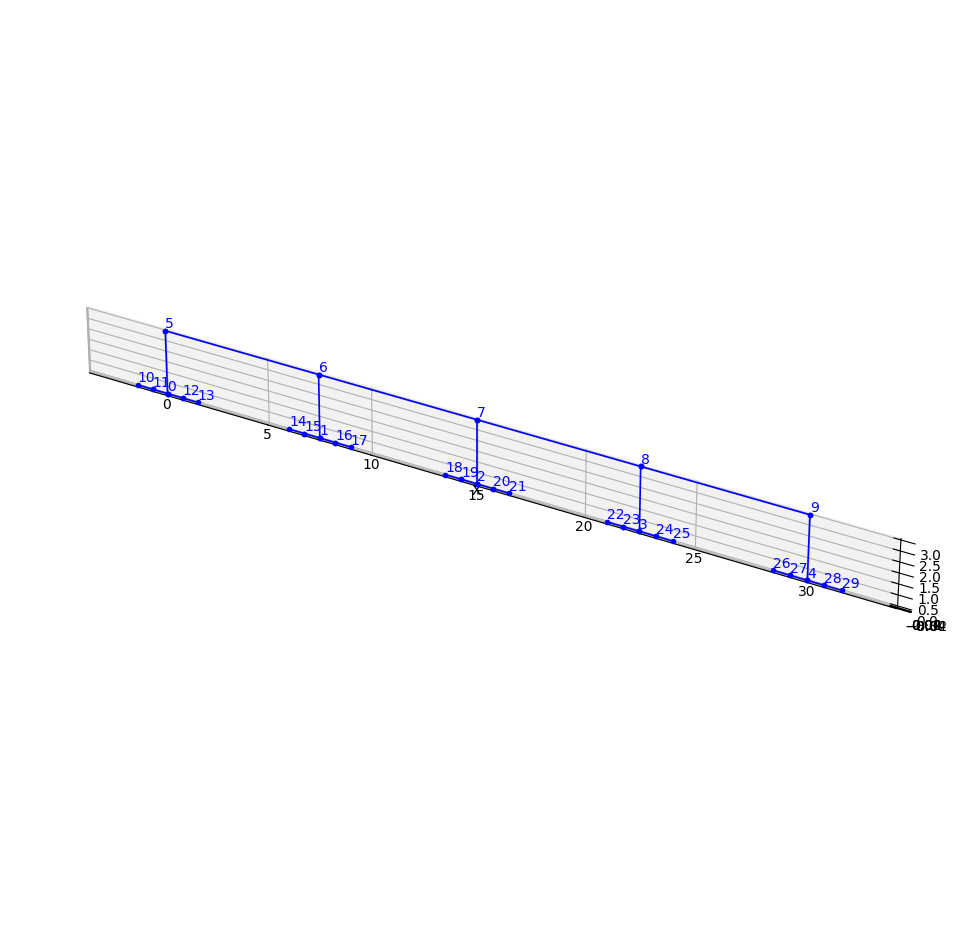

In [3]:
## Create the FR-2c2 model
beam_to_node = {}
nodes_coords = {}
# Clear existing model
ops.wipe()

# Define Model Builder
ops.model('basic', '-ndm', 3, '-ndf', 6)  # 3D model with 6 DOF per node

# Define parameters
n_bay = 4        # Number of bays
l_bay = 7.5      # Length of each bay
h_bay = 3.0      # Height of each story
numStories = 1  # Number of stories

# Material properties frame
b_frame = 1
d_beam = 0.375
d_column = 0.375
E = 70e9  # Young's Modulus in Pa
A_beam = b_frame * d_beam   # Area of the element in m^2
A_column = b_frame * d_column
mu = 0.28
G = E/(2*(1+mu))
Iy_beam = b_frame * d_beam**3/12
Iz_beam = d_beam**3 * b_frame/12  # Moment of Inertia in m^4
Iy_column = b_frame * d_column**3/12
Iz_column = d_column**3 * b_frame/12  # Moment of Inertia in m^4

# calculate torsional constant for beam
a = max(b_frame, d_beam)
b = min(b_frame, d_beam)
J_beam = a * b**3 / 16 * (16/3 - 3.36 * b/a * (1 - b**4/(12*a**4)))
# calculate torsional constant for column
a = max(b_frame, d_column)
b = min(b_frame, d_column)
J_column = a * b**3 / 16 * (16/3 - 3.36 * b/a * (1 - b**4/(12*a**4)))

# Material properties footing
bfoot = b_frame
dfoot = 3
E_foot = E # Young's Modulus in Pa
A_foot = bfoot * dfoot   # Area of the element in m^2
G_foot = G
Iy_foot = bfoot * dfoot**3/12
Iz_foot = dfoot**3 * bfoot/12  # Moment of Inertia in m^4
a = max(bfoot, dfoot)
b = min(bfoot, dfoot)
J_foot = a * b**3 / 16 * (16/3 - 3.36 * b/a * (1 - b**4/(12*a**4)))

# Define footing meshing parameters
num_ele_per_footing = 4 # Needs to be even
size_per_footing = 3
ele_size_footing = size_per_footing / num_ele_per_footing
num_nodes_in_frame = (n_bay + 1) * (numStories + 1)
num_elems_in_frame = n_bay * numStories + (n_bay + 1) * numStories

# Create nodes
for i in range(numStories + 1):
    for j in range(n_bay + 1):
        nodeTag = i * (n_bay + 1) + j + 0
        x = j * l_bay
        z = i * h_bay
        ops.node(nodeTag, x, 0, z)
        nodes_coords[nodeTag] = [x, 0, z]

# Define geometric transformation
horizontal_gTTag = 1
vertical_gTTag = 2
ops.geomTransf('Linear', horizontal_gTTag, 0, 0, 1)
ops.geomTransf('Linear', vertical_gTTag, 0, 1, 0)
# Define elements
for i in range(numStories):
    for j in range(n_bay):
        # Horizontal elements (beams)
        nodeI = (i + 1) * (n_bay + 1) + j + 0
        nodeJ = nodeI + 1
        eleTag = i * (n_bay) + j + 0
        ops.element('elasticBeamColumn', eleTag, nodeI, nodeJ, A_beam, E, G, J_beam, Iy_beam, Iz_beam, horizontal_gTTag)
        beam_to_node[eleTag] = {'nodes':[nodeI, nodeJ],
                                'length': l_bay}

    for j in range(n_bay + 1):
        if i < numStories:
            # Vertical elements (columns)
            nodeI = i * (n_bay + 1) + j + 0
            nodeJ = nodeI + (n_bay + 1)
            eleTag = n_bay * numStories + i * (n_bay + 1) + j + 0
            ops.element('elasticBeamColumn', eleTag, nodeI, nodeJ, A_column, E, G, J_column, Iy_column, Iz_column, vertical_gTTag)
# Define nodes for footing
footing_nodes_ind = []
footing_coord_x = []
footing_coord_y = []
footing_coord_z = []
for i in range(n_bay + 1):
    footing_nodes_ind_bay_i = []
    x_footing_center = i * l_bay
    x_footing_start = x_footing_center - size_per_footing / 2
    for j in range(num_ele_per_footing + 1):
        if j == num_ele_per_footing / 2:
            footing_nodes_ind.append(i)
            footing_coord_x.append(x_footing_center)
            footing_coord_y.append(0)
            footing_coord_z.append(0)
            continue
        if j < num_ele_per_footing / 2:
            nodeTag = num_nodes_in_frame + i * num_ele_per_footing + j + 0
        else:
            nodeTag = num_nodes_in_frame + i * num_ele_per_footing + j - 1
        x = x_footing_start + j * ele_size_footing
        z = 0
        ops.node(nodeTag, x, 0, z)
        nodes_coords[nodeTag] = [x, 0, z]
        footing_nodes_ind.append(nodeTag)
        footing_coord_x.append(x)
        footing_coord_y.append(0)
        footing_coord_z.append(z)
    
# Define elements for footing   
for i in range(n_bay + 1):
    for j in range(num_ele_per_footing):
        if j < num_ele_per_footing / 2 - 1:
            nodeI = num_nodes_in_frame + i * num_ele_per_footing + j
            nodeJ = nodeI + 1
        elif j == num_ele_per_footing / 2 - 1:
            nodeI = num_nodes_in_frame + i * num_ele_per_footing + j + 0
            nodeJ = i
        elif j == num_ele_per_footing / 2:
            nodeI = i
            nodeJ = num_nodes_in_frame + i * num_ele_per_footing + j + 0
        else:
            nodeI = num_nodes_in_frame + i * num_ele_per_footing + j - 1
            nodeJ = nodeI + 1
        eleTag = num_elems_in_frame + i * num_ele_per_footing + j + 0
        ops.element('elasticBeamColumn', eleTag, nodeI, nodeJ, A_foot, E_foot, G_foot, J_foot, Iy_foot, Iz_foot, horizontal_gTTag)

footing_nodes_ind = np.array(footing_nodes_ind).astype(int)
footing_coord_x = np.array(footing_coord_x).astype(float)
footing_coord_y = np.array(footing_coord_y).astype(float)
footing_coord_z = np.array(footing_coord_z).astype(float)

# Calculate the self weight loads (simplified as point loads, needs refinement)
num_of_nodes = num_nodes_in_frame + len(footing_nodes_ind) - (n_bay + 1)
self_weight_unit = np.zeros(num_of_nodes * 6).astype(float)
for _, nodes in beam_to_node.items():
    nodeI = nodes['nodes'][0]
    nodeJ = nodes['nodes'][1]
    length = nodes['length']
    self_weight_unit[nodeI * 6 + 2] += (-1/2*length)
    self_weight_unit[nodeJ * 6 + 2] += (-1/2*length)
opsv.plot_model(element_labels=0, fig_wi_he = (50,30), local_axes=0);

In [4]:
# Shift the coordinates by 15m to the left, this does not affect the model stiffness
footing_coord_x = footing_coord_x - 15 
# Prepare the ground deformation
vl = 2.0/100
dispX_gf, dispZ_gf = prepare_greenfield_disp(val_data_dir, vl, footing_coord_x)
Es = 25e6
nis = 0.25
mu_int = np.tan(30*np.pi/180)
qz = 10000 * self_weight_unit
footing_ele_length = ele_size_footing * np.ones_like(footing_nodes_ind).astype(float)
footing_ele_width = bfoot * np.ones_like(footing_nodes_ind).astype(float)
model = ASREpy.ASRE_2D_frame_model(ops, footing_nodes_ind, footing_coord_x, 
                                   footing_coord_y, footing_coord_z,
                                   footing_ele_length, footing_ele_width, 
                                   qz, 'elasto-plastic')
# model = ASREpy.ASRE_2D_frame_model(ops, footing_nodes_ind, footing_coord_x, 
#                                    footing_coord_y, footing_coord_z,
#                                    footing_ele_length, footing_ele_width, 
#                                    qz, 'elastic')
model.set_soil_properties(Es, nis, mu_int)

In [5]:
# Test if fix all ground nodes
ground_node_id = [0, 1, 2, 3, 4] + list(range(10,30))
# ground_dof = [list(range(i*6, i*6+6)) for i in ground_node_id]
ground_dof = [dof for i in ground_node_id for dof in range(i*6, i*6+6)]
K = model.frame_stiffness.reshape(model.frame_system_size, model.frame_system_size)
K_fix = K[ground_dof,:][:, ground_dof]

free_node_id = np.setdiff1d(np.arange(model.frame_system_size/6), ground_node_id).astype(int)
free_dof = np.setdiff1d(np.arange(model.frame_system_size), ground_dof).astype(int)
K_free = K[free_dof,:][:, free_dof]

K_free_inv = np.linalg.inv(K_free)
# For self weight
qz_free = qz[free_dof]

disp_free = np.dot(K_free_inv, qz_free).reshape(-1, 6)
print('Calc 1:')
for i in disp_free:
    print(i)

# Test if add a big stiffness to the ground nodes
K_full = K.copy()
K_full[ground_dof, ground_dof] = K_full[ground_dof, ground_dof] * 10000
K_full_inv = np.linalg.inv(K_full)
disp_full = np.dot(K_full_inv, qz).reshape(-1, 6)
disp_full_free = disp_full[free_node_id]
print('Calc 2:')
for i in disp_full_free:
    print(i)


Calc 1:
[ 3.37348301e-08  0.00000000e+00 -4.28848336e-06  0.00000000e+00
  2.32227131e-07  0.00000000e+00]
[ 2.14455385e-08  0.00000000e+00 -8.56802456e-06  0.00000000e+00
  1.70563639e-07  0.00000000e+00]
[ 0.00000000e+00  0.00000000e+00 -8.57269845e-06  0.00000000e+00
 -3.97046694e-23  0.00000000e+00]
[-2.14455385e-08  0.00000000e+00 -8.56802456e-06  0.00000000e+00
 -1.70563639e-07  0.00000000e+00]
[-3.37348301e-08  0.00000000e+00 -4.28848336e-06  0.00000000e+00
 -2.32227131e-07  0.00000000e+00]
Calc 2:
[ 3.37348327e-08  0.00000000e+00 -4.28848378e-06  0.00000000e+00
  2.32227156e-07  0.00000000e+00]
[ 2.14455401e-08  0.00000000e+00 -8.56802539e-06  0.00000000e+00
  1.70563657e-07  0.00000000e+00]
[-1.12496563e-22  0.00000000e+00 -8.57269929e-06  0.00000000e+00
 -1.45583788e-22  0.00000000e+00]
[-2.14455401e-08  0.00000000e+00 -8.56802539e-06  0.00000000e+00
 -1.70563657e-07  0.00000000e+00]
[-3.37348327e-08  0.00000000e+00 -4.28848378e-06  0.00000000e+00
 -2.32227156e-07  0.00000000

Node: 5, Load: -37500.0
Node: 6, Load: -75000.0
Node: 7, Load: -75000.0
Node: 8, Load: -75000.0
Node: 9, Load: -37500.0
[3.373182801475707e-08, 0.0, -4.288483313529951e-06, 0.0, 2.3223552425479763e-07, 0.0]
[2.144358326952933e-08, 0.0, -8.568024587267642e-06, 0.0, 1.7056806456440078e-07, 0.0]
[4.6916428540941726e-23, 0.0, -8.572698484119102e-06, 0.0, -7.898994766359143e-23, 0.0]
[-2.1443583269529228e-08, 0.0, -8.56802458726764e-06, 0.0, -1.7056806456440075e-07, 0.0]
[-3.373182801475696e-08, 0.0, -4.288483313529952e-06, 0.0, -2.322355242547974e-07, 0.0]


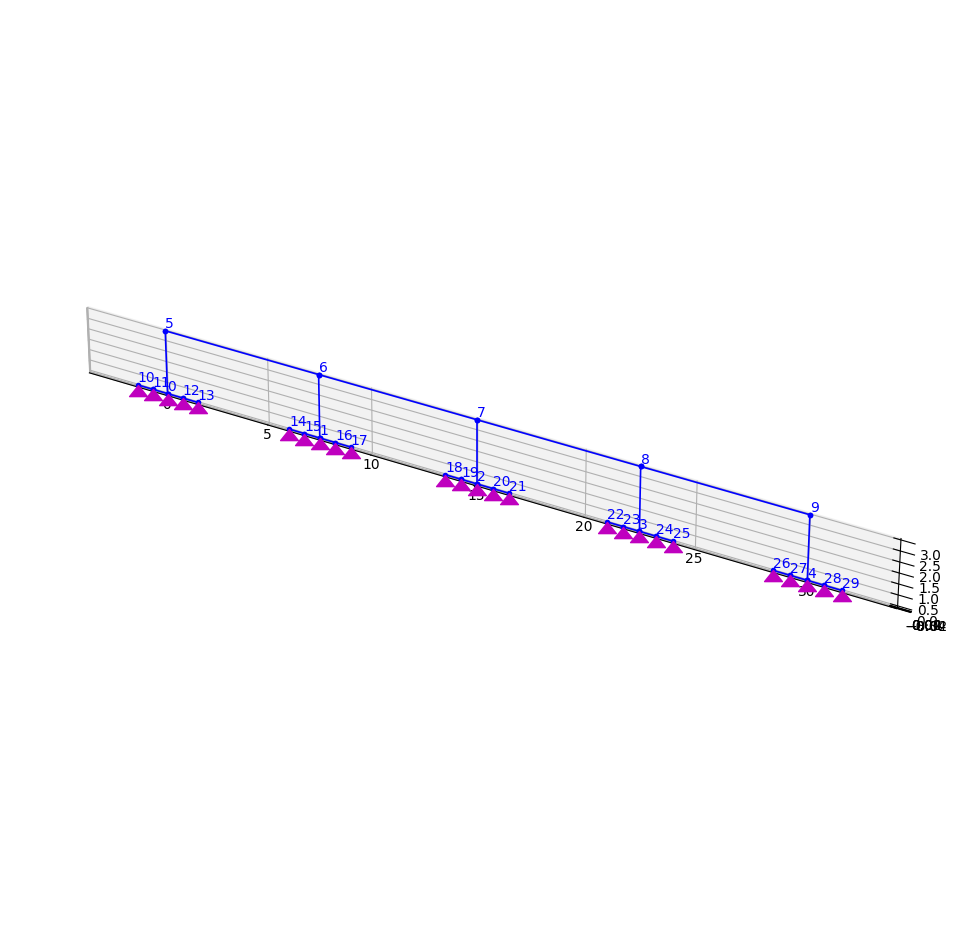

In [6]:
## Create the FR-2c2 model
beam_to_node = {}
# Clear existing model
ops.wipe()

# Define Model Builder
ops.model('basic', '-ndm', 3, '-ndf', 6)  # 3D model with 6 DOF per node

# Define parameters
n_bay = 4        # Number of bays
l_bay = 7.5      # Length of each bay
h_bay = 3.0      # Height of each story
numStories = 1  # Number of stories

# Material properties frame
b_frame = 1
d_beam = 0.375
d_column = 0.375
E = 70e9  # Young's Modulus in Pa
A_beam = b_frame * d_beam   # Area of the element in m^2
A_column = b_frame * d_column
mu = 0.28
G = E/(2*(1+mu))
Iy_beam = b_frame * d_beam**3/12
Iz_beam = d_beam**3 * b_frame/12  # Moment of Inertia in m^4
Iy_column = b_frame * d_column**3/12
Iz_column = d_column**3 * b_frame/12  # Moment of Inertia in m^4

# calculate torsional constant for beam
a = max(b_frame, d_beam)
b = min(b_frame, d_beam)
J_beam = a * b**3 / 16 * (16/3 - 3.36 * b/a * (1 - b**4/(12*a**4)))
# calculate torsional constant for column
a = max(b_frame, d_column)
b = min(b_frame, d_column)
J_column = a * b**3 / 16 * (16/3 - 3.36 * b/a * (1 - b**4/(12*a**4)))

# Material properties footing
bfoot = b_frame
dfoot = 3
E_foot = E # Young's Modulus in Pa
A_foot = bfoot * dfoot   # Area of the element in m^2
G_foot = G
Iy_foot = bfoot * dfoot**3/12
Iz_foot = dfoot**3 * bfoot/12  # Moment of Inertia in m^4
a = max(bfoot, dfoot)
b = min(bfoot, dfoot)
J_foot = a * b**3 / 16 * (16/3 - 3.36 * b/a * (1 - b**4/(12*a**4)))

# Define footing meshing parameters
num_ele_per_footing = 4 # Needs to be even
size_per_footing = 3
ele_size_footing = size_per_footing / num_ele_per_footing
num_nodes_in_frame = (n_bay + 1) * (numStories + 1)
num_elems_in_frame = n_bay * numStories + (n_bay + 1) * numStories

# Create nodes
for i in range(numStories + 1):
    for j in range(n_bay + 1):
        nodeTag = i * (n_bay + 1) + j + 0
        x = j * l_bay
        z = i * h_bay
        ops.node(nodeTag, x, 0, z)

# Define geometric transformation
horizontal_gTTag = 1
vertical_gTTag = 2
ops.geomTransf('Linear', horizontal_gTTag, 0, 0, 1)
ops.geomTransf('Linear', vertical_gTTag, 0, 1, 0)
# Define elements
for i in range(numStories):
    for j in range(n_bay):
        # Horizontal elements (beams)
        nodeI = (i + 1) * (n_bay + 1) + j + 0
        nodeJ = nodeI + 1
        eleTag = i * (n_bay) + j + 0
        ops.element('elasticBeamColumn', eleTag, nodeI, nodeJ, A_beam, E, G, J_beam, Iy_beam, Iz_beam, horizontal_gTTag)
        beam_to_node[eleTag] = {'nodes':[nodeI, nodeJ],
                                'length': l_bay}

    for j in range(n_bay + 1):
        if i < numStories:
            # Vertical elements (columns)
            nodeI = i * (n_bay + 1) + j + 0
            nodeJ = nodeI + (n_bay + 1)
            eleTag = n_bay * numStories + i * (n_bay + 1) + j + 0
            ops.element('elasticBeamColumn', eleTag, nodeI, nodeJ, A_column, E, G, J_column, Iy_column, Iz_column, vertical_gTTag)
# Define nodes for footing
footing_nodes_ind = []
footing_coord_x = []
footing_coord_y = []
footing_coord_z = []
for i in range(n_bay + 1):
    footing_nodes_ind_bay_i = []
    x_footing_center = i * l_bay
    x_footing_start = x_footing_center - size_per_footing / 2
    for j in range(num_ele_per_footing + 1):
        if j == num_ele_per_footing / 2:
            footing_nodes_ind.append(i)
            footing_coord_x.append(x_footing_center)
            footing_coord_y.append(0)
            footing_coord_z.append(0)
            continue
        if j < num_ele_per_footing / 2:
            nodeTag = num_nodes_in_frame + i * num_ele_per_footing + j + 0
        else:
            nodeTag = num_nodes_in_frame + i * num_ele_per_footing + j - 1
        x = x_footing_start + j * ele_size_footing
        z = 0
        ops.node(nodeTag, x, 0, z)
        footing_nodes_ind.append(nodeTag)
        footing_coord_x.append(x)
        footing_coord_y.append(0)
        footing_coord_z.append(z)
    
# Define elements for footing   
for i in range(n_bay + 1):
    for j in range(num_ele_per_footing):
        if j < num_ele_per_footing / 2 - 1:
            nodeI = num_nodes_in_frame + i * num_ele_per_footing + j
            nodeJ = nodeI + 1
        elif j == num_ele_per_footing / 2 - 1:
            nodeI = num_nodes_in_frame + i * num_ele_per_footing + j + 0
            nodeJ = i
        elif j == num_ele_per_footing / 2:
            nodeI = i
            nodeJ = num_nodes_in_frame + i * num_ele_per_footing + j + 0
        else:
            nodeI = num_nodes_in_frame + i * num_ele_per_footing + j - 1
            nodeJ = nodeI + 1
        eleTag = num_elems_in_frame + i * num_ele_per_footing + j + 0
        ops.element('elasticBeamColumn', eleTag, nodeI, nodeJ, A_foot, E_foot, G_foot, J_foot, Iy_foot, Iz_foot, horizontal_gTTag)

footing_nodes_ind = np.array(footing_nodes_ind).astype(int)
footing_coord_x = np.array(footing_coord_x).astype(float)
footing_coord_y = np.array(footing_coord_y).astype(float)
footing_coord_z = np.array(footing_coord_z).astype(float)

# Calculate the self weight loads (simplified as point loads, needs refinement)
num_of_nodes = num_nodes_in_frame + len(footing_nodes_ind) - (n_bay + 1)
self_weight_unit = np.zeros(num_of_nodes * 6).astype(float)
for _, nodes in beam_to_node.items():
    nodeI = nodes['nodes'][0]
    nodeJ = nodes['nodes'][1]
    length = nodes['length']
    self_weight_unit[nodeI * 6 + 2] += (-1/2*length)
    self_weight_unit[nodeJ * 6 + 2] += (-1/2*length)


for i in ground_node_id:
    ops.fix(i, 1, 1, 1, 0, 0, 0)

ops.timeSeries('Linear', 1)
ops.pattern('Plain', 1, 1)

for i, node in enumerate(free_node_id):
    ops.load(node.item(), 0, 0, qz_free[i*6+2], 0, 0, 0)
    print(f'Node: {node.item()}, Load: {qz_free[i*6+2]}')

ops.system('FullGeneral')
ops.numberer("Plain")
ops.constraints("Plain")
ops.integrator("LoadControl", 1)
ops.algorithm("Linear")
ops.analysis("Static")
ops.analyze(1)

for i in free_node_id:
    print(ops.nodeDisp(i.item(), 0))
opsv.plot_model(element_labels=0, fig_wi_he = (50,30), local_axes=0);



In [7]:
model.run_model(dispX_gf, np.zeros_like(dispX_gf), dispZ_gf, 'disp')

ASRE run starts
solver type
elasto-plastic
footing_nodes_size_size:
25
footing_ele_length_eigen:
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
0.75
footing_nodes_eigen:
10
11
 0
12
13
14
15
 1
16
17
18
19
 2
20
21
22
23
 3
24
25
26
27
 4
28
29
footing_nodes:
FLEX_3DOF: 
 7.36255e-08            0            0  2.05059e-08            0  4.89906e-09  1.05292e-08            0  2.60641e-09  7.05063e-09            0   1.7552e-09  5.29569e-09            0  1.32081e-09  2.12147e-09            0  5.30171e-10  1.92871e-09            0  4.82029e-10  1.76805e-09            0  4.41898e-10  1.63209e-09            0  4.07933e-10  1.51555e-09            0  3.78815e-10  1.06096e-09            0  2.65215e-10  1.01044e-09            0   2.5259e-10   9.6452e-10            0  2.41112e-10  9.22589e-10            0  2.30631e-10  8.84151e-10            0  2.21024e-10  7.07333e-10            0  1.76826e-10  6.84518e-10            0  1.71

True

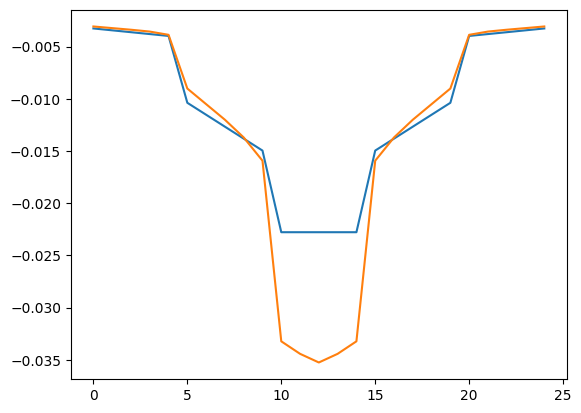

In [8]:
plt.plot(model.beam_DispV[model.footing_nodes_ind])
plt.plot(dispZ_gf)

WARNING FullGenLinLapackSolver::solve() -factorization failed, matrix singular U(i,i) = 0, i= 362
WARNING NewtonRaphson::solveCurrentStep() -the LinearSysOfEqn failed in solve()
StaticAnalysis::analyze() - the Algorithm failed at step: 0 with domain at load factor 0.1
OpenSees > analyze failed, returned: -3 error flag


IndexError: index 0 is out of bounds for axis 1 with size 0

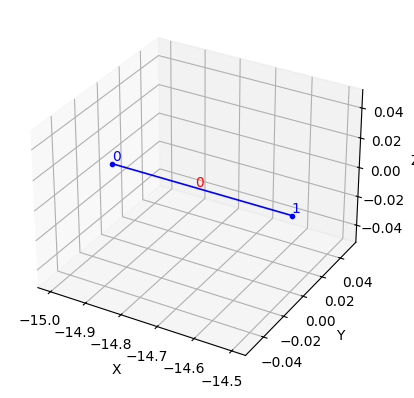

In [18]:
import numpy as np
# Import OpenSeesPy
from openseespy.opensees import *

# Wipe existing model
ops.wipe()

# Define the model builder
ops.model('basic', '-ndm', 3, '-ndf', 6)  # 3D model with 6 DOF per node

# Define nodes
beamX = np.linspace(-15, 15, 61)
nodeTag = 0
for i, x in enumerate(beamX):
    ops.node(i, x, 0.0, 0.0)

# Define boundary conditions
# fix(1, 1, 1, 1)
# fix(3, 1, 1, 0)

# Material properties
bfoot = 10
dfoot = 0.12
E = 70e9  # Young's Modulus in Pa
A = bfoot * dfoot   # Area of the element in m^2
EoverG = 2.6
G = E/EoverG
Iy = dfoot**3 * bfoot/12
Iz = bfoot**3 * dfoot/12  # Moment of Inertia in m^4
J = Iy + Iz

# Define coord transfer
horizontal_gTTag = 1
vertical_gTTag = 2
ops.geomTransf('Linear', horizontal_gTTag, 0, 0, 1)

# Define elements
for i in range(beamX.size - 1):
    # ops.element('elasticBeamColumn', i, i, i+1, A, E, G, J, Iy, Iz, horizontal_gTTag)
    ops.element('ElasticTimoshenkoBeam', i, i, i+1, E, G, A, J, Iy, Iz, bfoot*dfoot, bfoot*dfoot,horizontal_gTTag)

# Define constraints and analysis
ops.constraints('Plain')
ops.numberer('RCM')
ops.system('FullGeneral')
ops.test('NormDispIncr', 1.0e-6, 10)
ops.algorithm('Newton')
ops.integrator('LoadControl', 0.1)
ops.analysis('Static')

# Perform the analysis
ops.analyze(1)

# Print the global stiffness matrix
# ops.printA()

# Optional: Print the stiffness matrix to a file

K = ops.printA('-ret')
opsv.plot_model()

In [ ]:
N = ops.systemSize() # Has to be done after analyze
K = np.array(K)
K.shape = (N,N)
print(K)

[[1.68000000e+11 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 6.45533141e+10 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 8.41636515e+09 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 5.38539077e+11
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  7.27622822e+08 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.40403458e+12]]


In [ ]:
np.savetxt('opensees_K.txt', K, fmt = '%.4e')

In [ ]:
L = beamX[1] - beamX[0]
print(12*E*Iz/L**3 * 1e-13)
print(G*J/L)

6.720000000000001
538539076923.07697


In [ ]:
EoverG = 2.6
ni_str = EoverG/2 - 1
k = 10 * (1 + ni_str) / (12 + 11 * ni_str)
phi3 = 12 * E * Iz / k / G / A / (L * L)
phi3Bar = 1/(1+phi3)
print(phi3Bar)
12 * E * Iz * phi3Bar/ pow(L, 3)

0.0008163265306122449


np.float64(54857142857.14286)

: 

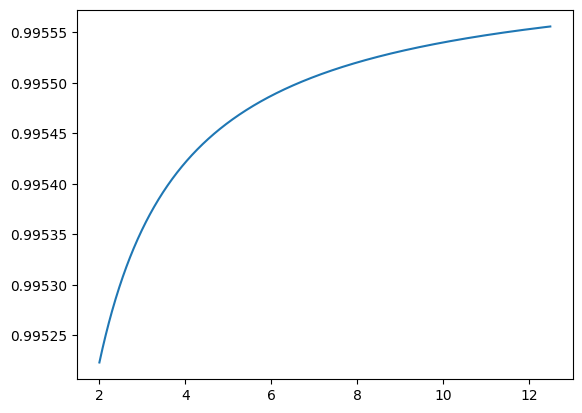

In [ ]:
EoverG = np.linspace(2, 12.5, 1000)
bfoot = 10
dfoot = 50
A = bfoot * dfoot   # Area of the element in m^2
Iy = dfoot**3 * bfoot/12
Iz = bfoot**3 * dfoot/12  # Moment of Inertia in m^4
ni_str = EoverG/2 - 1
k = 10 * (1 + ni_str) / (12 + 11 * ni_str)
phi3 = 12 * E * Iz / k / G / A / (L * L)
phi3Bar = 1/(1+phi3)
plt.plot(EoverG, phi3Bar)


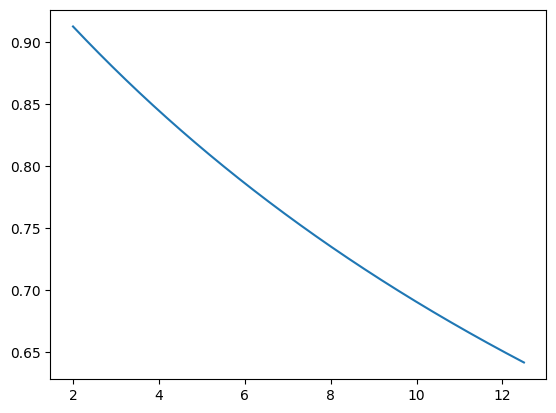

In [ ]:
EoverG = np.linspace(2, 12.5, 1000)
ni_str = EoverG/2 - 1
k = 10 * (1 + ni_str) / (12 + 11 * ni_str)
bfoot = 10
dfoot = 1
L = 5
A = bfoot * dfoot   # Area of the element in m^2
Iy = dfoot**3 * bfoot/12
Iz = bfoot**3 * dfoot/12  # Moment of Inertia in m^4
phi2 = 12 * EoverG * Iy / k / A / (L * L)
phi2Bar = 1/(1+phi2)
plt.plot(EoverG, phi2Bar)

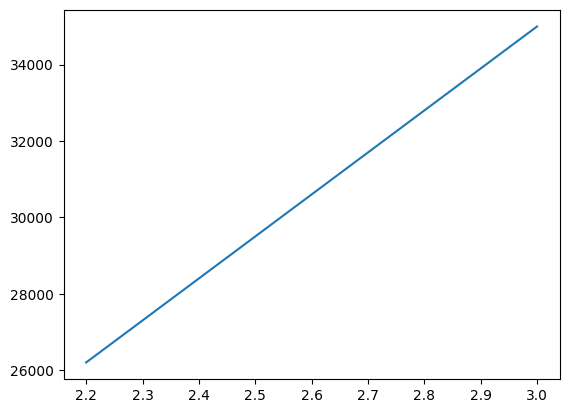

In [ ]:
EoverG = np.linspace(2.2, 3, 1000)
ni_str =  EoverG/2 - 1
G = E/EoverG
k = 10 * (1 + ni_str) / (12 + 11 * ni_str)
phi2 = 12 * EoverG * Iy / k / A / (L * L)
plt.plot(EoverG, phi2)